In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)

## Loading in

In [3]:
df_pigmentation = pd.read_csv('pigmentation.tsv', sep='\t', index_col='egg ID')
df_thickness = pd.read_csv('pigmentation_and_thickness.csv', index_col='eggID')

df = pd.concat([df_pigmentation, df_thickness], axis=1, sort=False)

df.head()

,species,pigment,species,thick unpigmented,thick pigmented,diference between
12,arctic tern,45.029,arctic tern,258.0,252.0,6.0
21,arctic tern,24.147,arctic tern,218.0,200.0,18.0
22a,arctic tern,23.894,arctic tern,232.0,214.0,18.0
22b,arctic tern,25.784,arctic tern,226.0,212.0,14.0
38,arctic tern,28.446,arctic tern,208.0,188.0,20.0


### Data Cleaning

In [4]:
df.isnull().sum()

species                6
pigment                6
species               39
thick unpigmented     39
thick pigmented       39
diference between     39
dtype: int64

In [5]:
df = df.dropna().iloc[:-1,1:]

In [6]:
df['pigmentation_ratio'] = df['thick unpigmented']/df['thick pigmented']

In [7]:
df.tail()

,pigment,species,thick unpigmented,thick pigmented,diference between,pigmentation_ratio
31,25.352,oystercatcher,126.000000,118.000000,8.000000,1.067797
32,23.663,oystercatcher,226.000000,208.000000,18.000000,1.086538
35,24.588,oystercatcher,213.333333,186.666667,26.666667,1.142857
36,18.362,oystercatcher,226.000000,212.000000,14.000000,1.066038
37,15.584,oystercatcher,200.000000,194.000000,6.000000,1.030928


## Renaming species to scientific name

In [8]:
name_mapping = {
    'arctic tern': 'Sterna paradisaea',
    'common gull': 'Larus canus',
    'lapwing': 'Vanellus vanellus',
    'oystercatcher': 'Haematopus ostralegus',
    'ringed plover': 'Charadrius hiaticula',  # Charadrius or Charadruis??
}

df['scientific_name'] = df['species'].apply(name_mapping.get) + ' (' + df['species'] + ')'

In [9]:
df.head()

,pigment,species,thick unpigmented,thick pigmented,diference between,pigmentation_ratio,scientific_name
12,45.029,arctic tern,258.0,252.0,6.0,1.023810,Sterna paradisaea (arctic tern)
21,24.147,arctic tern,218.0,200.0,18.0,1.090000,Sterna paradisaea (arctic tern)
22a,23.894,arctic tern,232.0,214.0,18.0,1.084112,Sterna paradisaea (arctic tern)
22b,25.784,arctic tern,226.0,212.0,14.0,1.066038,Sterna paradisaea (arctic tern)
38,28.446,arctic tern,208.0,188.0,20.0,1.106383,Sterna paradisaea (arctic tern)


In [10]:
df[df['species']=='lapwing']

,pigment,species,thick unpigmented,thick pigmented,diference between,pigmentation_ratio,scientific_name
1,23.860,lapwing,248.0,228.0,20.0,1.087719,Vanellus vanellus (lapwing)
3,40.752,lapwing,256.0,226.0,30.0,1.132743,Vanellus vanellus (lapwing)


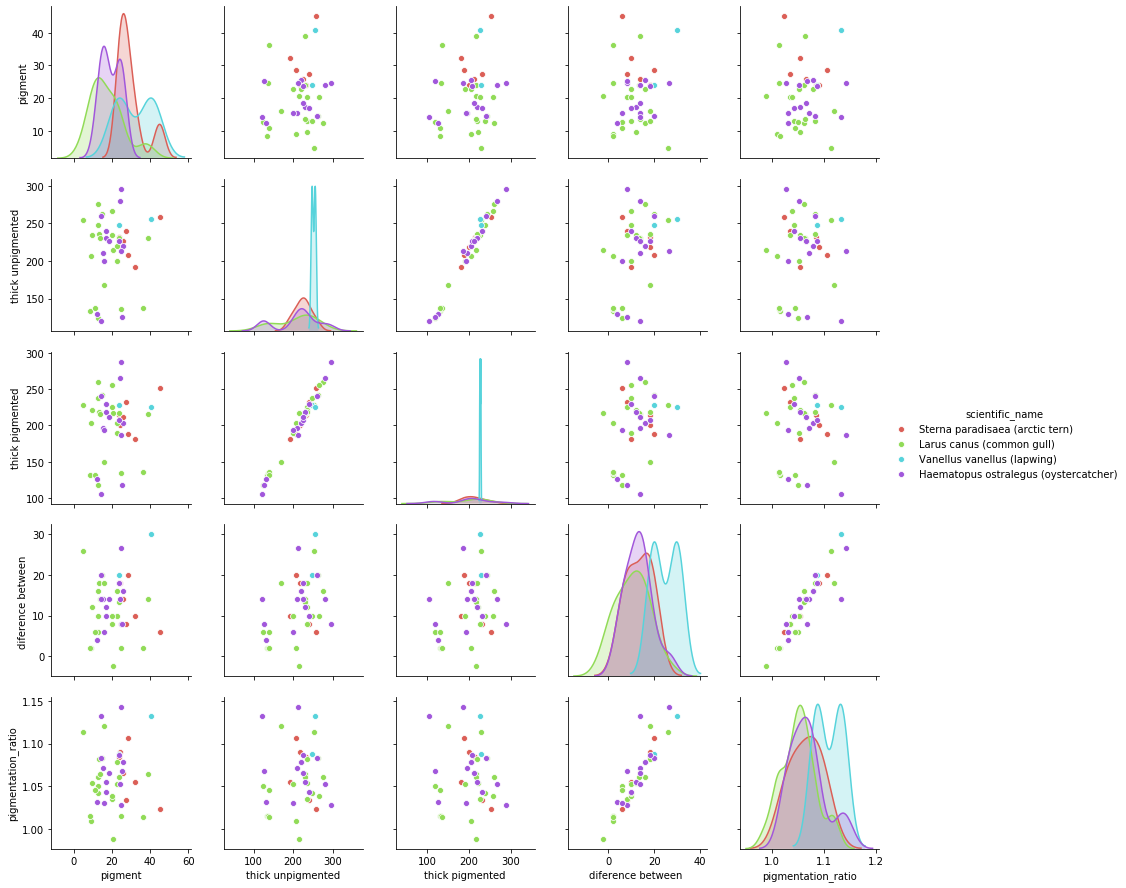

In [11]:
sns.pairplot(df, hue='scientific_name', palette="hls")

In [12]:
df.describe()

,pigment,thick unpigmented,thick pigmented,diference between,pigmentation_ratio
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,20.737614,214.416667,201.882576,12.534091,1.062347
std,8.848314,46.515265,43.833158,7.052276,0.034706
min,4.615000,120.000000,106.000000,-2.500000,0.988506
25%,14.120000,200.000000,187.666667,8.000000,1.038146
50%,20.380000,226.000000,213.000000,13.666667,1.061538
75%,24.615500,242.000000,228.000000,18.000000,1.082817
max,45.029000,296.000000,288.000000,30.000000,1.142857


## Running stats

In [13]:
df_stats = df.groupby('scientific_name').mean()
df_stats

,pigment,thick unpigmented,thick pigmented,diference between,pigmentation_ratio
scientific_name,,,,,
Haematopus ostralegus (oystercatcher),19.445714,212.666667,199.476190,13.190476,1.069293
Larus canus (common gull),17.548857,208.523810,197.912698,10.611111,1.052045
Sterna paradisaea (arctic tern),29.582429,224.857143,211.428571,13.428571,1.065681
Vanellus vanellus (lapwing),32.306000,252.000000,227.000000,25.000000,1.110231


## Plotting

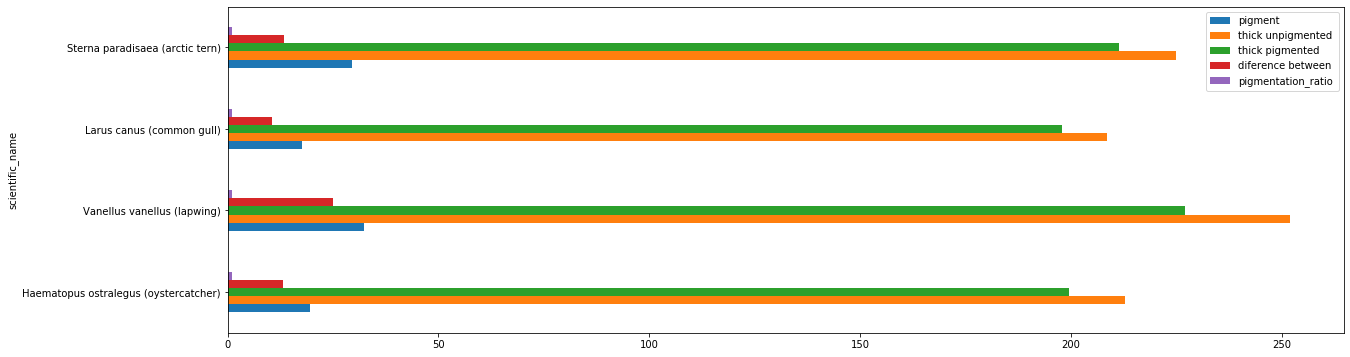

In [14]:
# re-ordering them so they are in the same order as the picture
order = ['Sterna paradisaea (arctic tern)', 'Larus canus (common gull)', 'Vanellus vanellus (lapwing)', 'Haematopus ostralegus (oystercatcher)'][::-1]
df_stats = df_stats.reindex(order)

df_stats.plot.barh()

<img src="pylogeny tree.png" style="width: 600px;">

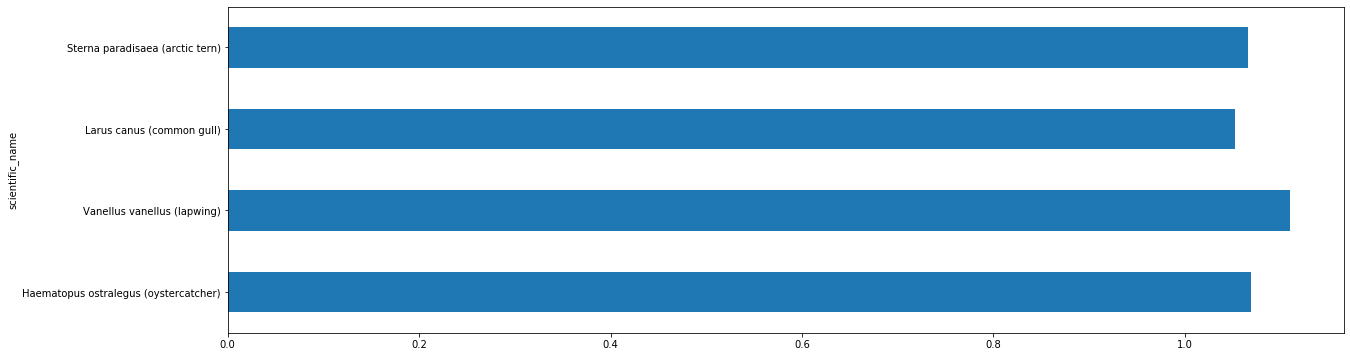

In [15]:
df_stats['pigmentation_ratio'].plot.barh()